# Algoritmos

Un *algoritmo* es una "receta" computacional, que consiste en una serie de instrucciones para que la computadora lleve a cabo un cálculo dado. Gran parte del curso consistirá en desarrollar algoritmos para calcular distintas cantidades en la física.

Algunos algoritmos (por ejemplo, la eliminación gaussiana que veremos más adelante) proveen una manera de llevar a cabo un cálculo de manera "exacta" (dentro de las restricciones impuestas por el uso de números con precisión finita) en un número finito de pasos.

Sin embargo, en general, no podemos esperar que haya una fórmula analítica cerrada para calcular las cantidades de interés de manera exacta. En este caso, será necesario emplear un algoritmo *iterativo*.

## Algoritmos iterativos

Un algoritmo iterativo normalmente empieza desde una adivinanza inicial $x_0$, y aplica un procedimiento / receta matemática, o sea alguna función (en el sentido más general de la palabra) $f$, para producir una siguiente adivinanza $x_1 := f(x_0)$. Esto se repite para producir una secuencia $x_0, x_1, \ldots, x_n, \ldots$, con

$$x_{n+1} := f(x_n).$$

La esperanza es que la secuencia $x_n$ converja hacia un valor límite $x^*$ cuando $n \to \infty$, tal que $x^*$ sea la solución del problema original.

Dado que no podemos llevar a cabo la iteración un número infinito de veces, se corta la iteración después de un cierto número de pasos, para dar una solución *aproximada*, que se acerca dentro de cierta *tolerancia* al resultado teórico exacto $x^*$. Por lo tanto, cualquier algoritmo iterativo requiere una condición de terminación.

# Raíces cuadradas: Algoritmo Babilónico

Un primer ejemplo de un algoritmo útil es el *algoritmo Babilónico* (o de Herón) para calcular la raiz cuadrada de un número real. Supongamos que queramos calcular $\sqrt{y}$. No hay manera de calcular este número de manera precisa en un número finito de pasos, usando sólo las operaciones aritméticas básicas. (Por supuesto, es una sola llamada a la función 
`sqrt` en Julia, pero eso no cuenta...).

Para un algoritmo, necesitamos una *idea*, que toma una adivinanza $x_n$ y produce una mejor, $x_{n+1}$.

En el caso de la raiz cuadrada $\sqrt{y}$, dada una adivinanza $x_n$, podemos reconocer que el número $\frac{y}{x_n}$ está del otro lado de $\sqrt{y}$ que $x_n$, y que entonces tenemos la *idea* de que el valor medio entre los dos podría servir:

$$x_{n+1} := \textstyle \frac{1}{2} (x_n + \textstyle \frac{y}{x_n}).$$

Aunque la notación matemática requiere pensar en el número $n$ del iterado, en un programa conviene más pensar en valores "viejos" y "nuevos" en cada paso de la iteración.


[1] Implementa una función que toma una adivinanza y produce una mejor aproximación para la raiz cuadrada.

[2] Implementa una función recursiva que toma el valor de $y$ y una adivinanza inicial, y calcula la raiz cuadrada. ¡No olvides la condición de terminación!

[3] Implementa una función que calcule la raíz cuadrada de un número. 

[4] ¿Qué tan rápida es la convergencia al valor correcto?
Es decir, ¿cómo depende la distancia del iterado $x_n$ desde el límite, como función del número de paso $n$? Dibuja unos iterados.



In [14]:
using PyPlot;


(.:3355): Gtk-WARNING **: Theme parsing error: gtk.css:3:11: Not using units is deprecated. Assuming 'px'.
INFO: Loading help data...


2.0000000929222947
2.0000000929222947
10.000046356507898


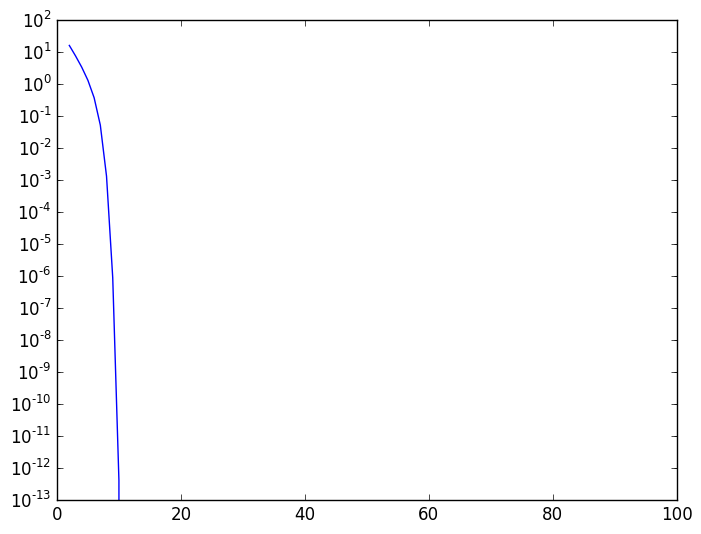

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe9014ee4a8>

In [33]:
## Raiz cuadrata de bucle
function ar_sqrt(y, x0, ϵ)
    x_new = x0;
    x_old = 0;
    
    sy = sqrt(y);
    
    while abs(x_new-sy) > ϵ
        x_old = x_new;
        x_new = 0.5(x_old + y/x_old);
    end
    
    return x_new
end

## Raiz cuadrada recursiva
function rec_sqrt(y, x0, ϵ)
    sy = sqrt(y);
    
    if abs(x0 - sy) > ϵ
        return rec_sqrt(y, 0.5(x0 + y/x0), ϵ);
    else
        return x0;
    end
end

my_sqrt(y) = ar_sqrt(y, y/2, y/1e5);

println(ar_sqrt(4, 1, 1e-4));
println(rec_sqrt(4, 1, 1e-4));
println(my_sqrt(100))

## Let's plot the convergence
xr = 2:100;
y = 1234.0;
roots = [y/2];

for n in xr
    xn = 0.5(err[n-1] + y/err[n-1]);
    push!(roots, xn);
end

roots -= sqrt(y);
yscale("log");
plot(xr, abs(roots[1:end-1])./sqrt(y))

# Raíces de funciones: Bisección

Muchos problemas en la física requieren la solución de ecuaciones complicadas, por ejemplo trascendentales, las cuales no es posible resolver de manera analítica. Por ejemplo, calcular el tiempo de intersección $\tau$ entre un oscilador armónico y una partícula libre requiere resolver una ecuación para el tiempo de la forma

$$\cos(\tau) = x_0 - v \tau.$$

Cualquier problema de este tipo se puede pensar como el de resolver una ecuación de la forma $F(x) = 0$, es decir, encontrar *raíces* o *ceros* $x^*$ tales que $F(x^*) = 0$. 

Suponiendo que $F$ es una función continua, una condición suficiente (pero no necesaria) para que *exista* una raiz en un intervalo dado $[a, b]$ es que $F$ cambie de signo en el intervalo, es decir, que $F(a)$ y $F(b)$ tengan signos opuestos. Por el teorema del valor intermedio, se sigue que $F$ tiene al menos un cero en $[a, b]$.

Para ubicar la raíz en este intervalo, la idea del método de bisección es literalmente de dividir en dos el intervalo, poniendo
$$c := \textstyle \frac{1}{2}(a + b),$$
y checar el signo de $c$. Según el signo de $c$, el nuevo intervalo que considerar para buscar la raíz es o la mitad izquierda, o la mitad derecha.

# Raíces de funciones: Método de Newton--Raphson

Un algoritmo poderoso, pero a veces peligroso (como veremos más adelante), es el método de Newton, o de Newton--Raphson, para encontrar raíces de funciones $f$ que sean diferenciables. El algoritmo utiliza también información sobre la derivada $f'$ de la función $f$.

La idea del método es partir de la aproximación $x_n$ de una raíz, y predecir una posición más cercana de la raíz a través de la intersección de la recta tangente a la función en $x_n$ con el eje $x$.

[1] Haz un esbozo y utilízalo para calcular $x_{n+1}$ en términos de $x_n$ para el método de Newton.